## Heart Risk Predictor: A Machine Learning Approach

This project aims to identify the risk of heart disease using a dataset containing various health-related attributes. The data is normalized to ensure uniformity and ease of analysis. Following normalization, outliers within the dataset are identified and removed to improve the accuracy of the predictive models.

Once the data preprocessing steps are completed, the dataset is subjected to several classification algorithms to predict heart disease risk. These algorithms include Logistic Regression, K-Nearest Neighbors (KNN), among others.

Each classification algorithm is implemented as a separate class in another file. These classes are imported into the main file where they are utilized to apply the respective algorithms to the preprocessed dataset. Through this process, the project aims to build robust predictive models to assist in identifying individuals at risk of heart disease based on their health attributes.

Importing all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from math import exp

import seaborn as sns
from pandas.plotting import scatter_matrix

import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Importing the datafiles

In [2]:
zf = zipfile.ZipFile('archive.zip')
heart_data = pd.read_csv(zf.open('heart.csv'))

heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


After importing the dataset, it's essential to inspect its structure and summary statistics to gain initial insights into the data.

The `.info()` method provides a concise summary of the dataset, including the number of entries, data types of each column, and whether there are any missing values.
The `.describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the numerical attributes in the dataset.

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Visualization

To gain further insights into the dataset, we visualize the categorical and numerical features with respect to the target label.

#### Categorical Features Visualization

We have created a list of categorical features, with the target label as the last element of the list. Using Seaborn's `countplot` function, we visualize each categorical feature's distribution based on the target label. This helps us understand the relationship between categorical variables and the target label, revealing any patterns or trends.

#### Numerical Features Visualization

Similarly, we have created a list of numerical features, with the target label as the last element of the list. We utilize Seaborn's `pairplot` function to visualize pairwise relationships between numerical features, with the hue parameter set to the target label. This allows us to explore correlations between different numerical attributes and how they relate to the target label.

These visualizations provide valuable insights into the data distribution, relationships between features, and their impact on the target variable, aiding in feature selection and model interpretation. We use the `.corr()` function to calculate the correlation coefficients between pairs of numerical features in the dataset. This function computes Pearson correlation coefficients by default, which measure the linear relationship between two variables.


In [5]:
cat_variable = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_variable = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

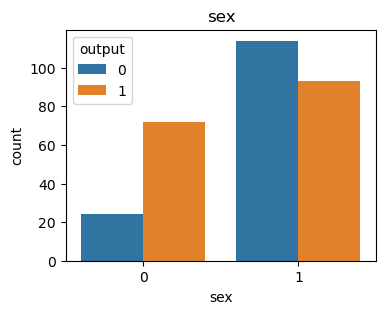

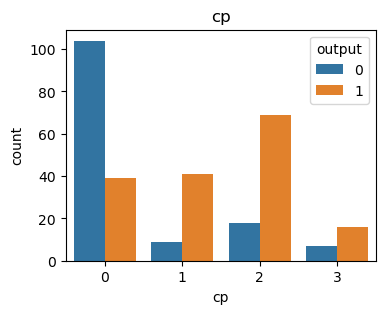

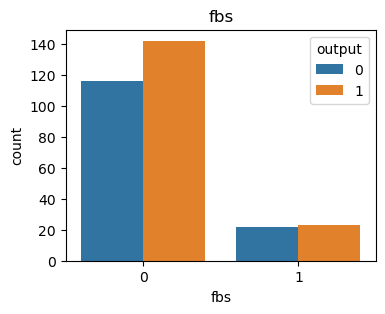

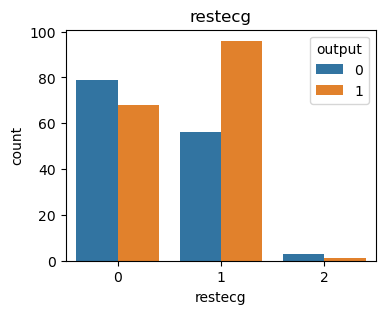

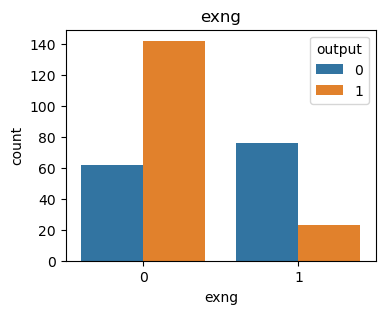

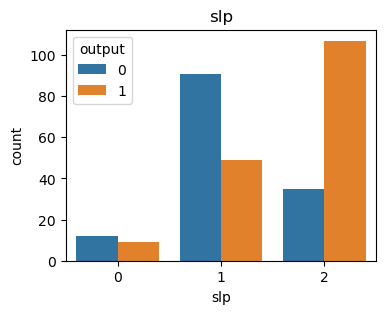

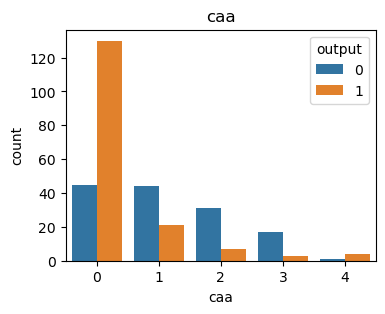

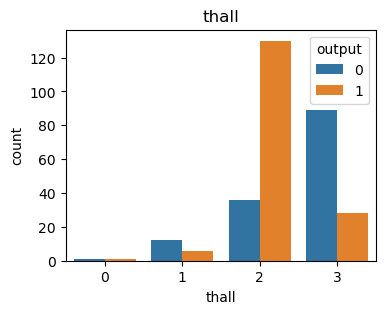

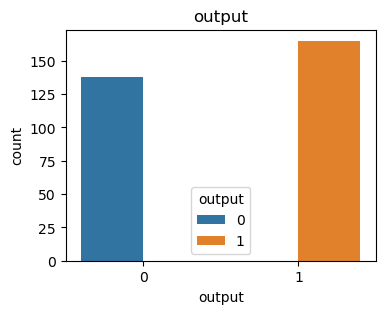

In [6]:
for i in cat_variable:
    plt.figure(figsize = (4, 3))
    sns.countplot(x = i, data = heart_data.loc[:, cat_variable], hue = "output")
    plt.title(i)

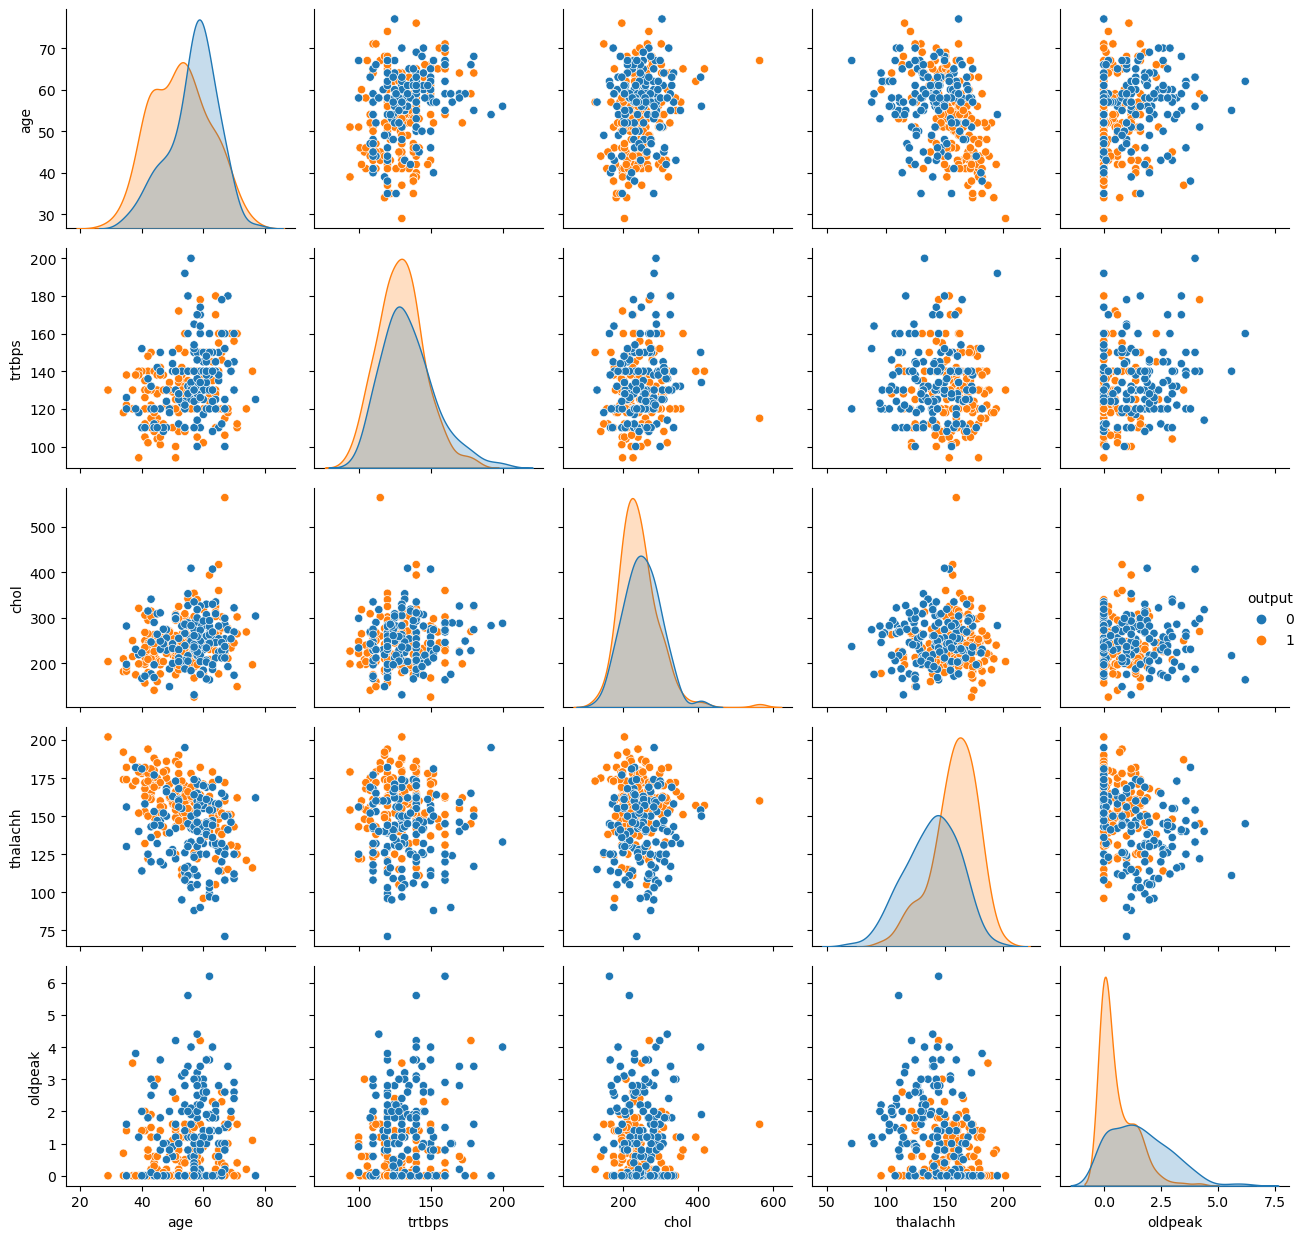

In [7]:
warnings.simplefilter(action ='ignore', category = FutureWarning)
warnings.simplefilter(action ='ignore', category = UserWarning)


sns.pairplot(data = heart_data.loc[:, num_variable], hue = "output").fig.tight_layout()
plt.show()

In [8]:
heart_data.loc[:, num_variable].corr()

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


### Features, Labels seperation
Using appropriate indexing or slicing techniques, we extract the features from the dataset, excluding the target label column. These features represent the attributes or variables that will be used to make predictions.

Similarly, we isolate the target label column from the dataset, representing the variable we aim to predict or classify.

This separation allows us to organize the data into input features and output labels, enabling us to feed the features into our machine learning models to predict the target labels accurately.

The features and labels are stored in separate variables, facilitating further preprocessing and model training steps.

In [9]:
heart_features = heart_data.iloc[:,:-1]
heart_labels = heart_data.iloc[:,-1]

### Data Normalization

Normalization is a crucial preprocessing step that scales the numerical and categorical features to a common range, ensuring that each feature contributes equally to the analysis and model training process.

#### Normalizing Numerical Variables

We employ the `normalize_num_variable` function to normalize the numerical features in the dataset. This function applies a normalization technique Min-Max scaling to rescale the numerical features to a predefined range.

Normalizing numerical variables helps mitigate the impact of varying scales and units, ensuring that all features have comparable magnitudes and reducing the dominance of certain variables in the model training process.

#### Normalizing Categorical Variables

In this section, we implement a function `normalize_cat_variable` to perform one-hot encoding for categorical variables in the dataset. One-hot encoding transforms categorical variables into a binary format, creating binary columns for each category.

Normalizing categorical variables enables us to represent categorical data in a numerical format suitable for model training, ensuring compatibility with machine learning algorithms that require numerical input.

These normalization functions prepare the dataset for subsequent model training steps, enhancing the performance and interpretability of our machine learning models by standardizing the input features.


In [10]:
def normalize_num_variable(df, variable):
    min_v = df.iloc[variable].min() 
    max_v = df.iloc[variable].max()
    for i in range(df.shape[0]):
        df.iloc[i, variable] = (df.iloc[i, variable] - min_v) / (max_v - min_v)

num_variables = [0, 3, 4, 7, 9]

for variable in num_variables:
    normalize_num_variable(heart_features, variable)


In [11]:
def normalize_cat_variable(df, variable):
    max_v = int(df.iloc[:, variable].max())
    
    for j in range(max_v + 1):
        new_column = df.columns[variable] + '_' + str(j)
        df[new_column] = 0
    
    for i in range(df.shape[0]):
        val = df.iloc[i, variable]
        column_name = df.columns[variable]
        new_column = column_name + '_' + str(val)
        df.loc[i, new_column] = 1
        #df = df.assign(new_column = 1)

cat_variables = [1, 2, 5, 6, 8, 10, 11, 12]

for variable in cat_variables:
    normalize_cat_variable(heart_features, variable)
    
for variable in cat_variable:
    #print("dorpping" + str(variable))
    #del heart_features[variable]
    try:
        del heart_features[variable]
    except KeyError:
        print("Column {} not found in DataFrame.".format(variable))

Column output not found in DataFrame.


Once the normalization is done, we used `info()` to view the summary of the normalized data.

In [12]:
heart_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trtbps     303 non-null    float64
 2   chol       303 non-null    float64
 3   thalachh   303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   sex_0      303 non-null    int64  
 6   sex_1      303 non-null    int64  
 7   cp_0       303 non-null    int64  
 8   cp_1       303 non-null    int64  
 9   cp_2       303 non-null    int64  
 10  cp_3       303 non-null    int64  
 11  fbs_0      303 non-null    int64  
 12  fbs_1      303 non-null    int64  
 13  restecg_0  303 non-null    int64  
 14  restecg_1  303 non-null    int64  
 15  restecg_2  303 non-null    int64  
 16  exng_0     303 non-null    int64  
 17  exng_1     303 non-null    int64  
 18  slp_0      303 non-null    int64  
 19  slp_1      303 non-null    int64  
 20  slp_2     

### Outlier Detection and Removal

To ensure the quality and integrity of our dataset, we perform outlier detection and removal on the numeric variables. Outliers are data points that significantly deviate from the rest of the dataset and may introduce bias or inaccuracies into our analysis and modeling process.

#### Boxplot Visualization

We begin by visually inspecting the distribution of each numeric variable using boxplots. Boxplots provide a visual summary of the central tendency, dispersion, and skewness of the data, making it easier to identify potential outliers.

#### Outlier Identification

After viewing the boxplots, we use the Interquartile Range (IQR) method to identify outliers. The IQR method involves calculating the interquartile range (the difference between the 75th and 25th percentiles) and defining outliers as data points that fall below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR).

#### Outlier Removal

Once outliers are identified, we proceed to remove them from the dataset. By removing outliers, we mitigate their potential impact on our analysis and modeling process, leading to more robust and accurate results.

The outlier removal process ensures that our dataset is clean and reliable, setting a solid foundation for subsequent data analysis and model training.


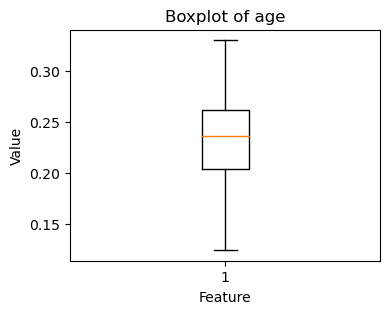

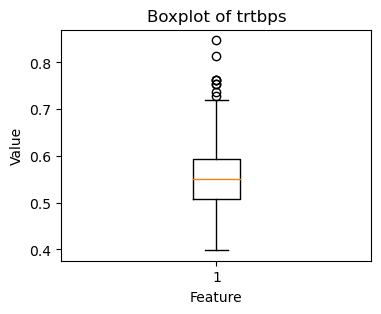

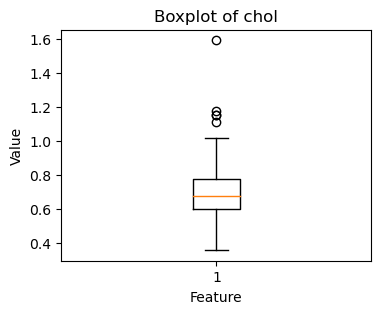

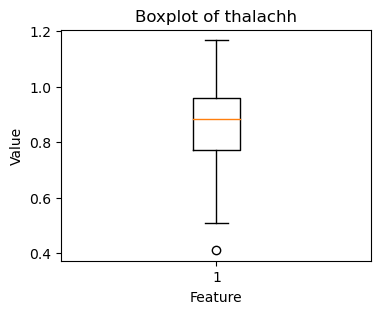

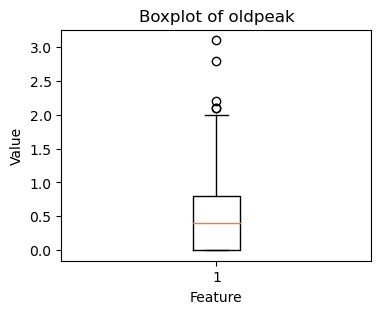

In [13]:
num_list = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for variable in num_list:
    plt.figure(figsize = (4,3))  
    plt.boxplot(heart_features[variable]) 
    plt.title(f'Boxplot of {variable}') 
    plt.xlabel('Feature') 
    plt.ylabel('Value')  
    plt.show()

In [14]:
for variable in num_list:
    Q1 = np.percentile(heart_features[variable], 25)
    Q3 = np.percentile(heart_features[variable], 75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5)*IQR
    upper_bound = Q3 + (1.5)*IQR
    
    mask = (heart_features[variable] >= lower_bound) & (heart_features[variable] <= upper_bound)
    #ask = mask.reset_index(drop=True)
    indices = mask[mask].index
    
    heart_features = heart_features.loc[indices]
    heart_labels = heart_labels.loc[indices]

Following the removal of outliers from the dataset, it's essential to reset the index to ensure consistency and coherence in the data structure.

In [15]:
heart_features.reset_index()
heart_features.describe()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.231729,0.550474,0.683835,0.867296,0.474296,0.299296,0.700704,0.457746,0.172535,0.292254,...,0.485915,0.580986,0.221831,0.123239,0.056338,0.017606,0.007042,0.059859,0.563380,0.369718
std,0.039321,0.065119,0.126423,0.131172,0.513071,0.458758,0.458758,0.499091,0.378512,0.455601,...,0.500684,0.494269,0.416211,0.329292,0.230980,0.131745,0.083770,0.237644,0.496842,0.483580
min,0.124464,0.398305,0.355932,0.508671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200644,0.508475,0.592514,0.773121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.236052,0.550847,0.675141,0.884393,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.257511,0.593220,0.763418,0.971098,0.800000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.330472,0.720339,1.016949,1.167630,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Splitting: Train-Test Split

To evaluate the performance of our machine learning models, we split the dataset into training and testing sets. This allows us to train the model on a portion of the data and evaluate its performance on unseen data.


Splitting the data into training and testing sets is a fundamental step in machine learning model development, enabling us to assess and validate the model's performance before deploying it in real-world applications.


#### Train-Test Split

We employ the `train_test_split` function from the scikit-learn library to split the dataset into training and testing sets. This function randomly divides the data into two subsets: the training set, used to train the model, and the testing set, used to evaluate its performance.

The data is split in an 80:20 ratio by default, with 80% of the data allocated to the training set and 20% to the testing set. This ratio ensures an adequate amount of data for model training while retaining a sufficient portion for evaluation.


In [16]:
trainval_X, test_X, trainval_y, test_y = train_test_split(heart_features, heart_labels, test_size = 0.2, random_state = 1)

### Logistic Regression Model Training and Evaluation

To perform logistic regression, we utilize a custom implementation encapsulated within the `Logistic_Regression` class defined in the 'LogisticRegression.ipynb' file. This class enables us to train a logistic regression model with specified parameters such as learning rate (`lr`) and number of epochs (`epochs`).

#### Importing Logistic Regression Class

We import the `Logistic_Regression` class from the 'LogisticRegression.ipynb' file using the `%run` magic command. This allows us to access and utilize the functionality of the logistic regression implementation within our current file.


In [17]:
%run LogisticRegression.ipynb

model = Logistic_Regression(lr = 0.1, epochs = 1000)
model.fit(trainval_X, trainval_y)
y_pred = model.predict(test_X)


accu = accuracy(y_pred, test_y)
print(accu)

0.8421052631578947


### K-Nearest Neighbors (KNN) Model Training and Evaluation

To perform K-Nearest Neighbors (KNN) classification, we utilize a custom implementation encapsulated within the `KNN` class defined in the 'KNN.ipynb' file. This class enables us to train a KNN model with specified parameters such as the number of neighbors (`k`).

#### Importing KNN Class

We import the `KNN` class from the 'KNN.ipynb' file using the `%run` magic command. This allows us to access and utilize the functionality of the KNN implementation within our current file.


In [18]:
%run KNN.ipynb

model2 = KNN(k = 3)
model2.fit(trainval_X, trainval_y)
y_knn = model.predict(test_X)


acck = accuracy(y_knn, test_y)
print(acck)

0.8421052631578947
